# Lab - Using the right chart (solutions)


This lab lets us practice our technical skills in plotting using `seaborn` and gets us thinking about effective charts and what kind of graph is most suitable for the data and purpose. 

For all the exercises below all our answers are just suggestions - you may well have better answers! And we encourage you to play with customisation of the plots (keeping all the learnings around data-to-ink ratio, chart junk, simplicity, colour, font size etc. in mind!). 

All the datasets can be found in the `data` folder in this lab folder. 

In [1]:
# before we begin, import the libraries and set parameters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 8

<hr style="border:0.2px solid black"> </hr>

# Comparison Plots

Here the goal is to contrast different values between categories or time points. 

**Bar or column charts** are the best choice for this. The bars give a strong and immediate impression of relative size, but people’s ability to process pre-attentive attributes is limited - show too many comparisons and the effect is undermined.

If there are too many points to represent, or too many categories to make comparisons natural, then we typically turn to **line graphs**. These are particularly suited to time points where the line is naturally suggestive of progression from left to right. However most line charts become confusing beyond 6-8 lines except in unusual circumstances. In this event, we may need to consider faceting our data over multiple subplots. We haven't covered facetting today but you can find out more about it [here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

## Task

Create a suitable plot for the following datasets:

> `late_deliveries`

> `recovery_times` (Hint: you might want to look into `sns.catplot`)

### Late deliveries plot

In [2]:
# check out the data
late_deliveries = pd.read_csv("data/late_deliveries.csv")
late_deliveries.head()
late_deliveries.tail()

,date,late_deliveries
43,2018-08-01,74
44,2018-09-01,66
45,2018-10-01,63
46,2018-11-01,52
47,2018-12-01,61


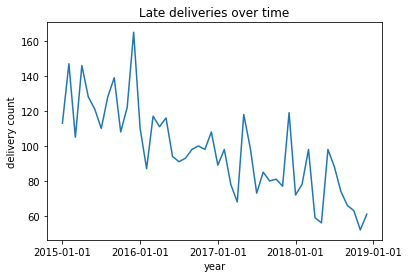

In [3]:
# pick a line plot, because we have data over time we want to show
sns.lineplot(x = "date", y = "late_deliveries", data = late_deliveries);

# add some labels and titles
plt.xlabel("year") 
plt.ylabel("delivery count") 
plt.title("Late deliveries over time");

# change the tick marks on the x-axis to make it neater
plt.xticks(["2015-01-01", "2016-01-01", "2017-01-01" ,"2018-01-01", "2019-01-01"]);


### Recovery times plot

In [4]:
recovery_times = pd.read_csv("data/recovery_times.csv")
recovery_times.head()

,prognosis,treatment_group,recovery
0,Excellent,treatment_a,6
1,Good,treatment_a,7
2,Average,treatment_a,12
3,Poor,treatment_a,15
4,Excellent,treatment_b,7


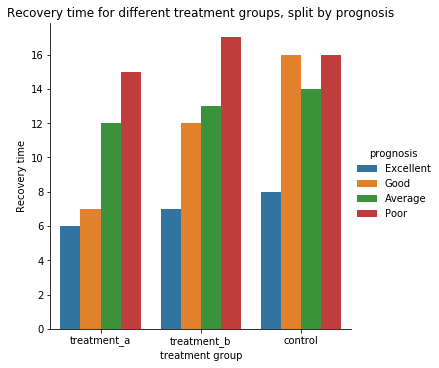

In [5]:
# we have different categories, so a bar plot is probably good to see them all
sns.catplot(x = "treatment_group", y = "recovery", data = recovery_times, 
            hue = "prognosis", kind = "bar")

# add titles and labels
plt.title("Recovery time for different treatment groups, split by prognosis")
plt.ylabel("Recovery time");
plt.xlabel("treatment group");

<hr style="border:0.2px solid black"> </hr>

# Connection Plots

Here the objective is to identify the relationship between two or three continuous variables.

This is the purpose **scatter plots** were designed for.We can supplement the scatter plot with size or colour aesthetics to show a third dimension, but the effectiveness of this for continuous variables can be uncertain - too many colours can be difficult to make sense of, and sizes are hard to compare.

If you want to include a categorical variable as your third, this is more hopeful, although if you have too many categories it can run into the same issues.

## Task

Create a suitable plot for the following datasets:

> `blood_pressure`

> `car_use`

### Blood pressure plot

In [6]:
# check out the data
blood_pressure = pd.read_csv("data/blood_pressure.csv")
blood_pressure.head()

,daily_saturated_fat_intake_mg,systolic_blood_pressure_mm_hg
0,31.840512,148.469227
1,26.643062,128.983803
2,23.240241,127.239366
3,22.840532,130.992788
4,22.923968,127.600460


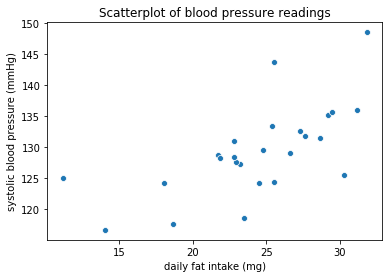

In [7]:
# have two sets of numbers to compare. Want to probably make a scatterplot
sns.scatterplot(x = "daily_saturated_fat_intake_mg", 
                y = "systolic_blood_pressure_mm_hg", 
                data = blood_pressure)

# add some titles and labels
plt.xlabel("daily fat intake (mg)")
plt.ylabel("systolic blood pressure (mmHg)");
plt.title("Scatterplot of blood pressure readings"); 

### Car use plot

In [8]:
# check out the data
car_use = pd.read_csv("data/car_use.csv")
car_use.head()

,city,car_use_percent,population,air_so2_concentration_ppm
0,A,0.190134,52756.531425,0.308758
1,B,0.252174,183568.684515,2.057070
2,C,0.335155,3283.327866,0.586131
3,D,0.136883,88007.259212,0.403134
4,E,0.036455,35903.004798,0.090044


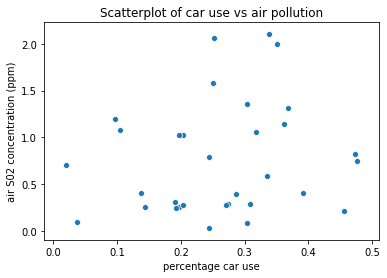

In [9]:
# can compare two numerical variables, so can use a scatterplot to 
# see if there are relationships
sns.scatterplot(x = "car_use_percent", 
                y = "air_so2_concentration_ppm", 
                data = car_use);

# add some titles and labels
plt.xlabel("percentage car use")
plt.ylabel("air S02 concentration (ppm)");
plt.title("Scatterplot of car use vs air pollution"); 

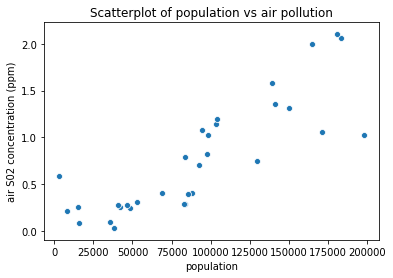

In [10]:
# didn't see much of a relationship there, so can look at another variable
sns.scatterplot(x = "population", 
                y = "air_so2_concentration_ppm", 
                data = car_use);

# add some titles and labels
plt.xlabel("population")
plt.ylabel("air S02 concentration (ppm)");
plt.title("Scatterplot of population vs air pollution");

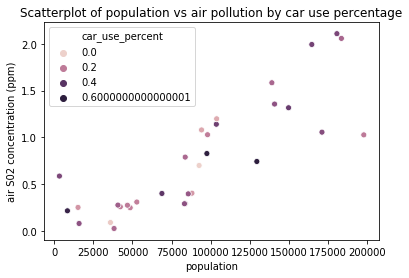

In [11]:
# could see if car use is somehow involved too.... 
sns.scatterplot(x = "population", 
                y = "air_so2_concentration_ppm", hue = "car_use_percent",
                data = car_use);

# add some titles and labels
plt.xlabel("population")
plt.ylabel("air S02 concentration (ppm)");
plt.title("Scatterplot of population vs air pollution by car use percentage");

<hr style="border:0.2px solid black"> </hr>

# Composition Plots

Here the goal is to show how the parts of a whole relate to each other, or how they alter over time.

If you’re only looking at a single composition, a **pie chart** is fine.

If you want to compare multiple compositions, then a **stacked bar chart** is probably better suited to the purpose (lengths are easier to compare than angles).

If you are looking at the evolution of a composition over time then a **stacked bar chart** is also fine for a small number of time points, but if you have a large number of time points a **stacked area chart** may be more appropriate.

Lastly if you want to look at an accumulation (e.g. a series of debits and credits applied to an opening balance) then a **waterfall chart** is a standard way of representing this.

Be conscious whether you’re interest in the shape of the composition (relative size of the parts) or if the level of the composition (absolute size) is also of interest. In the former case, you will usually scale the parts to percentages of the whole. In the latter case you’ll usually retain the original units.

## Task

Make plots to display the data in:

> `pension_surplus`

### Pension surplus plot

In [12]:
# check out the data 
pension_surplus = pd.read_csv("data/pension_surplus.csv")
pension_surplus.head()

,item,balance,sign
0,2016 Balance plus interest (surplus/(deficit)),-150,negative
1,Actual vs expected investment returns,-90,negative
2,Actual vs expected mortality,10,positive
3,Improvement in retirement terms,-5,negative
4,Bulk transfers into scheme,1,positive


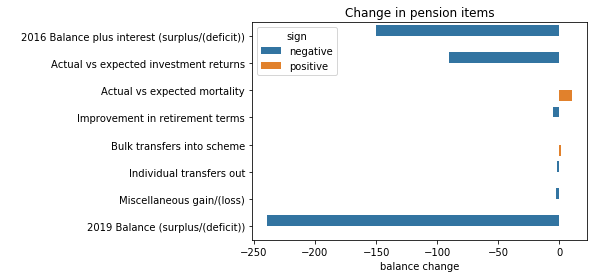

In [13]:
# we have count data and categories, could be a good shout for a bar chart
sns.barplot(x = "balance", 
            y = "item", hue = "sign", 
            data = pension_surplus, orient = "h");

# add some titles and labels
plt.title("Change in pension items");
plt.xlabel("balance change")
plt.ylabel(" ");

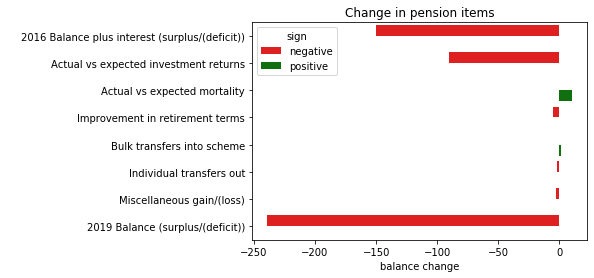

In [14]:
# could go further and set particular colours 
sns.barplot(x = "balance", y = "item", 
            hue = "sign", 
            palette = {"positive":"g", "negative":'r'} , 
            data = pension_surplus, orient = "h");


# add some titles and labels
plt.title("Change in pension items");
plt.xlabel("balance change")
plt.ylabel(" ");